In [19]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [20]:
# 根据带有噪声的线性模型构造一个人造数据集
# w = [2, -3.4] T  b = 4.2 和噪声
def synthetic_data(w, b, num_examples):
    """生成 y = Xw + b + 噪声"""
    X = torch.normal(0, 1, (num_examples, len(w))) # 生成X矩阵
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1,1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

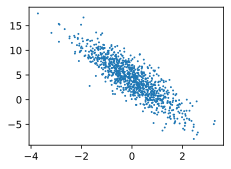

In [21]:
d2l.set_figsize()
# 把数据从计算图里detach出来
d2l.plt.scatter(features[:,1].detach().numpy(),
               labels.detach().numpy(),1);

In [22]:
# 定义一个data_iter函数，该函数接收批量大小、特征矩阵和标签向量作为输入
# 生成大小为batch_size的小批量

In [39]:
# def data_iter(batch_size, features, labels):
#     num_examples = len(features)
#     indices = list(range(num_examples))
#     # 这些样本是随机读取的，没有特定的顺序
#     random.shuffle(indices)
#     for i in range(0, num_examples, batch_size): # 每次跳一个batchsize
#         batch_indices = torch.tensor(
#             indices[i:min(i + batch_size, num_examples)]) # 每次取一个batchsize 并且防止越界
#         yield features[batch_indices], labels[batch_indices]
        
# batch_size = 10
# for X, y in data_iter(batch_size, features, labels):
#     print(X,'\n',y)
#     break
    
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
        
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.8183, -0.0535],
        [ 1.6564, -0.8745],
        [-0.6297, -0.6372],
        [-0.2774,  0.0425],
        [ 1.7070,  0.3873],
        [-1.2462,  0.5377],
        [ 0.8174,  0.4365],
        [ 0.9668, -0.8261],
        [-1.4818, -0.2364],
        [-1.3446, -0.0877]]) 
 tensor([[ 0.7561],
        [10.4997],
        [ 5.0952],
        [ 3.4865],
        [ 6.3020],
        [-0.1125],
        [ 4.3529],
        [ 8.9579],
        [ 2.0430],
        [ 1.8154]])


In [45]:
# # 定义 初始化模型参数
# w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
# b = torch.zeros(1, requires_grad=True)

w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [46]:
# 定义模型
# def linreg(X, w, b):
#     return torch.matmul(X, w) + b

def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [47]:
def squared_loss(y_hat,y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2
# def squared_loss(y_hat, y):  #@save
#     """均方损失"""
#     return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [48]:
## 定义优化算法
def sgd(params, lr, batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad(): # 更新的时候不用更新梯度
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
            
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [51]:
# 训练过程
lr = 0.05
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # x y 的小批量损失
        # 因为 l 的形状 是[batchsize, 1] 所以要相加
        # 再计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss{float(train_l.mean()):f}' )
        #print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss0.000048
epoch 2, loss0.000048
epoch 3, loss0.000048


In [50]:
bath_size = 10
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000048
epoch 2, loss 0.000048
epoch 3, loss 0.000048
